In [1]:
# Preprocessing the monthly data

In [2]:
import os as os
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import datetime as dt
plt.style.use('ggplot')

% matplotlib inline

# Ideas
- Which medallions survived over the year (nice bar chart)

## Read the data

# <font color='red'>TODO: Adjust to relative path!</font>

In [3]:
taxidata= pd.read_csv('/home/niklas/Documents/jSS16/CEP-Seminar/january13/data_jan13.csv',
                             sep=',')

In [4]:
taxidata.head()

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount
0,1,2013000001,2013000001,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:28:00,1,1680,3.94,-73.990784,40.760880,-73.954185,40.778847,CSH,20.5,0.5,0.00,21.50
1,2,2013000002,2013000002,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:06:00,5,360,0.98,-73.978325,40.778091,-73.981834,40.768639,CSH,6.0,0.5,0.00,7.00
2,3,2013000003,2013000003,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:10:00,1,600,2.77,-73.989616,40.729988,-74.013779,40.705036,CRD,10.5,0.5,2.20,13.70
3,4,2013000004,2013000004,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:08:00,2,480,1.68,-73.981575,40.767632,-73.977737,40.757927,CRD,8.0,0.5,1.70,10.70
4,5,2013000005,2013000005,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:16:00,4,960,4.05,-74.000526,40.737343,-73.977226,40.783607,CRD,14.5,0.5,4.65,20.15


Remove the first column

In [5]:
taxidata = taxidata.drop('Unnamed: 0',1)

Check if deleted

In [6]:
taxidata.head(10)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount
0,2013000001,2013000001,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:28:00,1,1680,3.94,-73.990784,40.760880,-73.954185,40.778847,CSH,20.5,0.5,0.00,21.50
1,2013000002,2013000002,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:06:00,5,360,0.98,-73.978325,40.778091,-73.981834,40.768639,CSH,6.0,0.5,0.00,7.00
2,2013000003,2013000003,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:10:00,1,600,2.77,-73.989616,40.729988,-74.013779,40.705036,CRD,10.5,0.5,2.20,13.70
3,2013000004,2013000004,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:08:00,2,480,1.68,-73.981575,40.767632,-73.977737,40.757927,CRD,8.0,0.5,1.70,10.70
4,2013000005,2013000005,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:16:00,4,960,4.05,-74.000526,40.737343,-73.977226,40.783607,CRD,14.5,0.5,4.65,20.15
5,2013000006,2013000006,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:17:00,6,1020,9.77,-73.866135,40.771091,-73.961334,40.764912,CSH,28.5,0.5,0.00,34.30
6,2013000007,2013000007,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:11:00,6,660,1.78,-74.006927,40.740765,-73.982994,40.739616,CRD,9.0,0.5,1.90,11.90
7,2013000008,2013000008,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,CSH,5.0,0.5,0.00,6.00
8,2013000009,2013000009,CMT,1,N,2013-01-01 00:00:00,2013-01-01 00:02:44,1,163,0.50,-73.999878,40.743343,-74.003708,40.748280,CRD,4.0,0.5,1.00,6.00
9,2013000010,2013000010,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:19:00,3,1140,2.81,-73.989845,40.758041,-73.972008,40.757069,CSH,14.5,0.5,0.00,15.50


In [7]:
taxidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14776615 entries, 0 to 14776614
Data columns (total 19 columns):
medallion             int64
hack_license          int64
vendor_id             object
rate_code             int64
store_and_fwd_flag    object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_time_in_secs     int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
pfare_amount          float64
surcharge             float64
tip_amount            float64
total_amount          float64
dtypes: float64(9), int64(5), object(5)
memory usage: 2.1+ GB


Make the datetimes to datetime-objects

In [8]:
taxidata['pickup_datetime'] =pd.to_datetime(taxidata['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
taxidata['dropoff_datetime'] =pd.to_datetime(taxidata['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [9]:
taxidata.describe()

,medallion,hack_license,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pfare_amount,surcharge,tip_amount,total_amount
count,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477653e+07,1.477653e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07
mean,2.013006e+09,2.013014e+09,1.034273e+00,1.697372e+00,6.834236e+02,2.770976e+00,-7.263634e+01,4.001440e+01,-7.259443e+01,3.999219e+01,1.166472e+01,3.204904e-01,1.267509e+00,1.395298e+01
std,3.665680e+03,8.540494e+03,3.387715e-01,1.365396e+00,4.944063e+02,3.305923e+00,1.013819e+01,7.789904e+00,1.028860e+01,7.537067e+00,9.639219e+00,3.675741e-01,2.046084e+00,1.146469e+01
min,2.013000e+09,2.013000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.771285e+03,-3.547921e+03,-2.350956e+03,-3.547921e+03,2.500000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,2.013003e+09,2.013007e+09,1.000000e+00,1.000000e+00,3.600000e+02,1.000000e+00,-7.399188e+01,4.073551e+01,-7.399121e+01,4.073468e+01,6.500000e+00,0.000000e+00,0.000000e+00,7.700000e+00
50%,2.013006e+09,2.013014e+09,1.000000e+00,1.000000e+00,5.540000e+02,1.700000e+00,-7.398166e+01,4.075315e+01,-7.398013e+01,4.075362e+01,9.000000e+00,0.000000e+00,8.000000e-01,1.050000e+01
75%,2.013009e+09,2.013021e+09,1.000000e+00,2.000000e+00,8.850000e+02,3.060000e+00,-7.396684e+01,4.076729e+01,-7.396390e+01,4.076819e+01,1.300000e+01,5.000000e-01,2.000000e+00,1.550000e+01
max,2.013013e+09,2.013032e+09,2.100000e+02,2.550000e+02,1.080000e+04,1.000000e+02,1.124042e+02,3.310365e+03,2.228738e+03,3.477106e+03,5.000000e+02,1.250000e+01,2.000000e+02,6.500000e+02


Really? Max passenger count is 255?

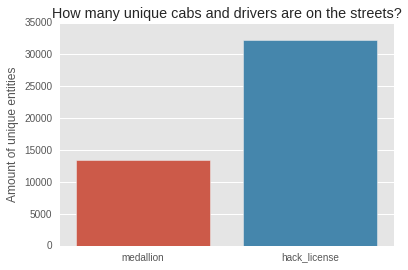

In [10]:
#plt.bar(taxidata.medallion.value_counts, height=1)
# plt.bar(np.arange(2) ,(len(pd.unique(taxidata.medallion)), len(pd.unique(taxidata.hack_license)))) # works
# plt.xticks('medallion', 'hack_licenses')
sns.barplot(y=[len(pd.unique(taxidata.medallion)), len(pd.unique(taxidata.hack_license))], 
            x=['medallion', 'hack_license'])
plt.ylabel('Amount of unique entities')
plt.title('How many unique cabs and drivers are on the streets?')

Generate new feature 'trip_duration' to compare it to the recorded 'trip_time_in_secs'

In [11]:
taxidata['trip_duration'] = taxidata['dropoff_datetime'] - taxidata['pickup_datetime']

In [12]:
taxidata.trip_duration.head()

0   00:28:00
1   00:06:00
2   00:10:00
3   00:08:00
4   00:16:00
Name: trip_duration, dtype: timedelta64[ns]

In [13]:
grouped = taxidata.groupby('medallion')

In Python 3, keys() return a Dictionary view object which does not support indexing. Therefore you need to apply a list() Wrapper around it

In [14]:
list(grouped.groups.keys())[:10] # Apply list wrapper, view first 10 entries

[2013003776,
 2013003777,
 2013003778,
 2013003779,
 2013003780,
 2013003781,
 2013003782,
 2013003783,
 2013003784,
 2013003785]

In [15]:
list(grouped.groups.keys())[-10:-1]  # last 10 entries

[2013003766,
 2013003767,
 2013003768,
 2013003769,
 2013003770,
 2013003771,
 2013003772,
 2013003773,
 2013003774]

In [16]:
grouped.size() # already sorted

medallion
2013000001    1101
2013000002     773
2013000003    1254
2013000004    1278
2013000005     927
2013000006    1351
2013000007    1232
2013000008     782
2013000009     990
2013000010     648
2013000011    1089
2013000012    1480
2013000013    1143
2013000014    1355
2013000015    1029
2013000016    1063
2013000017    1570
2013000018    1555
2013000019    1349
2013000020    1464
2013000021    1129
2013000022     874
2013000023     856
2013000024     324
2013000025     988
2013000026    1289
2013000027    1068
2013000028    1101
2013000029     620
2013000030    1177
              ... 
2013013397       1
2013013398     163
2013013399     510
2013013400     143
2013013401       1
2013013402     172
2013013403     424
2013013404     371
2013013405     108
2013013406       1
2013013407     344
2013013408      26
2013013409       1
2013013410       4
2013013411      72
2013013412     279
2013013413       1
2013013414       9
2013013415       1
2013013416      55
2013013417      47
20

In [17]:
grouped.size().describe()

count    13426.000000
mean      1100.596976
std        354.170632
min          1.000000
25%        903.000000
50%       1165.000000
75%       1355.000000
max       2137.000000
dtype: float64

# <font color='red'>TODO: Do the same for hack_licenses!</font>

Get number of drives per medallion.

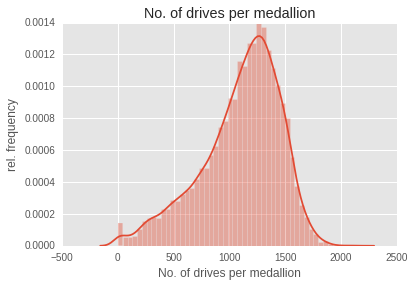

In [18]:
#plt.hist(grouped.size(), bins=100, normed=True)
a = sns.distplot(grouped.size(), kde=True)#, fit=stats.gamma)
plt.xlabel('No. of drives per medallion')
plt.ylabel('rel. frequency')
plt.title('No. of drives per medallion')

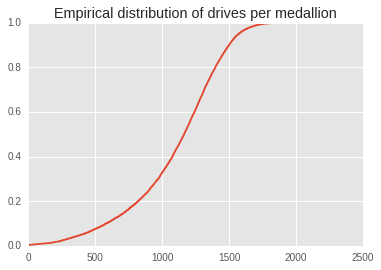

In [19]:
ecdf_medallion = ECDF(grouped.size())

#x = np.linspace(min(grouped.size()), max(grouped.size()))
plt.plot(ecdf_medallion.x, ecdf_medallion.y)
plt.title('Empirical distribution of drives per medallion')

This histogram describes the amount of rides per medallion.

In [20]:
grouped.trip_duration.agg(np.sum) # nice one! Need to save memory, therefore do not create a new variable

medallion
2013000001     8 days 22:17:00
2013000002     6 days 15:54:00
2013000003     9 days 19:02:00
2013000004    10 days 03:03:00
2013000005     6 days 19:50:00
2013000006    11 days 15:05:00
2013000007     8 days 14:47:00
2013000008     5 days 23:24:00
2013000009     7 days 11:27:51
2013000010     5 days 10:09:00
2013000011     8 days 23:12:00
2013000012    10 days 19:35:00
2013000013     8 days 06:58:00
2013000014     9 days 19:08:00
2013000015     7 days 15:19:00
2013000016     8 days 06:22:00
2013000017    11 days 02:04:00
2013000018    11 days 20:43:00
2013000019    10 days 18:09:34
2013000020    10 days 16:07:00
2013000021     9 days 09:31:00
2013000022     7 days 21:53:00
2013000023     6 days 23:01:00
2013000024     4 days 14:24:00
2013000025     7 days 16:49:00
2013000026     9 days 23:43:00
2013000027     9 days 02:57:00
2013000028     8 days 09:21:00
2013000029     4 days 19:26:00
2013000030     9 days 03:29:00
                    ...       
2013013397     0 days 00:00:1

In [21]:
print('Min trip_duration: ' + str(min(grouped.trip_duration.agg(np.sum))))
print('Max trip_duration: ' + str(max(grouped.trip_duration.agg(np.sum))))

Min trip_duration: -1 days +23:59:42
Max trip_duration: 66 days 09:37:41


There are some entries with negative Values? How is that possible?

In [22]:
# grouped.describe() # is absolutely too expensive (takes too long) !

At first, convert the timedeltas into other units (e.g. minutes (m) or hours (h)) in order to apply a histogram.

Retrieve first overview about hours of driving

In [23]:
grouped.trip_duration.agg(np.sum).astype('timedelta64[h]').describe() # use h,m,s for hours, minutes, seconds

count    13426.000000
mean       209.097497
std         59.327220
min         -1.000000
25%        181.000000
50%        221.000000
75%        250.000000
max       1593.000000
Name: trip_duration, dtype: float64

In [24]:
#grouped.trip_duration.describe() # nice stats per medallion

In [37]:
#taxidata.trip_duration.head()
list_of_neg_timedelta = []
for key, value in taxidata.trip_duration.iteritems():
    if value < dt.timedelta(0):
        list_of_neg_timedelta.append(key)
        

In [42]:
list_of_neg_timedelta
#len(list_of_neg_timedelta)

[895570,
 3911465,
 4043001,
 4065627,
 7850209,
 7971656,
 10478755,
 10506663,
 10733552,
 10806631,
 11259103,
 11260245,
 11265758,
 11271581,
 11273396,
 11273735,
 11274740,
 11413776,
 11414752,
 11415774,
 11416573,
 11450402,
 11470043,
 11489517,
 11517565,
 11629337,
 12748379,
 12754581,
 13030057,
 13094737,
 13114591,
 13199495,
 13200876,
 13201378,
 13202284,
 13440350,
 13926144,
 14286177,
 14304169,
 14385031,
 14405516,
 14406966,
 14419948,
 14427567,
 14429967,
 14473470,
 14530063,
 14564608]

In [43]:
np.savetxt("list_of_neg_timedelta_jan13.csv", list_of_neg_timedelta, delimiter=",", fmt='%s')

In [45]:
taxidata.loc[list_of_neg_timedelta]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,pfare_amount,surcharge,tip_amount,total_amount,trip_duration
895570,2013013095,2013009445,CMT,0,N,2013-01-03 09:15:13,2013-01-03 09:15:12,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,9.50,0.0,0.0,9.50,-1 days +23:59:59
3911465,2013013326,2013003946,CMT,0,N,2013-01-10 00:07:45,2013-01-10 00:07:43,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,45.00,0.0,0.0,45.00,-1 days +23:59:58
4043001,2013013334,2013029795,CMT,0,N,2013-01-10 10:21:10,2013-01-10 10:21:09,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,119.85,0.0,0.0,119.85,-1 days +23:59:59
4065627,2013009836,2013020959,CMT,0,N,2013-01-10 11:23:48,2013-01-10 11:23:47,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,14.50,0.5,3.0,18.00,-1 days +23:59:59
7850209,2013013384,2013015450,CMT,0,N,2013-01-18 01:47:23,2013-01-18 01:47:16,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,15.00,0.0,0.0,15.00,-1 days +23:59:53
7971656,2013013385,2013023952,CMT,0,N,2013-01-18 10:06:31,2013-01-18 10:06:27,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,33.00,0.0,7.0,40.50,-1 days +23:59:56
10478755,2013013406,2013030358,CMT,0,N,2013-01-23 15:03:30,2013-01-23 15:03:29,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,24.00,0.0,0.0,24.00,-1 days +23:59:59
10506663,2013002705,2013030061,CMT,0,N,2013-01-23 16:07:26,2013-01-23 16:07:24,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,40.70,0.5,0.0,41.20,-1 days +23:59:58
10733552,2013013389,2013010702,CMT,0,N,2013-01-23 23:48:51,2013-01-23 23:48:43,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,50.00,0.0,0.0,50.00,-1 days +23:59:52
10806631,2013007279,2013012226,CMT,0,N,2013-01-24 07:55:40,2013-01-24 07:55:35,1,0,0.0,0.000000,0.000000,0.000000,0.000000,CRD,65.00,0.0,0.0,65.00,-1 days +23:59:55


In [57]:
taxidata.loc[list_of_neg_timedelta].to_csv('drives_with_neg_timedelta_jan13.csv')

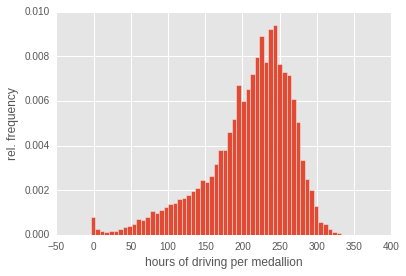

In [58]:
plt.hist(grouped.trip_duration.agg(np.sum).astype('timedelta64[h]'), range=[-10, 400], 
         bins=67, normed=True, stacked=True)
plt.xlabel('hours of driving per medallion')
plt.ylabel('rel. frequency')

Compare this to the data from trip_time_in_secs

(array([  0.00000000e+00,   7.66804853e-04,   2.79944629e-04,
          1.58229573e-04,   1.46058067e-04,   1.70401078e-04,
          1.82572584e-04,   2.43430112e-04,   3.40802157e-04,
          3.52973662e-04,   4.99031729e-04,   6.81604313e-04,
          7.30290336e-04,   8.03319369e-04,   1.08326400e-03,
          1.05892099e-03,   9.73720448e-04,   1.24149357e-03,
          1.39972314e-03,   1.38755164e-03,   1.66749627e-03,
          1.72835379e-03,   1.75269681e-03,   2.00829842e-03,
          2.19087101e-03,   2.08132746e-03,   2.36127209e-03,
          2.66555973e-03,   3.34716404e-03,   3.84619577e-03,
          3.85836727e-03,   4.72254417e-03,   5.35546246e-03,
          5.78146516e-03,   6.04923828e-03,   6.76735711e-03,
          7.30290336e-03,   8.26445230e-03,   8.98257113e-03,
          8.04536520e-03,   9.49377437e-03,   8.04536520e-03,
          8.14273724e-03,   7.43678992e-03,   7.27856035e-03,
          6.11009581e-03,   5.06334633e-03,   3.42019307e-03,
        

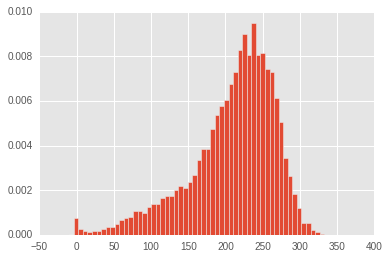

In [59]:
plt.hist(grouped.trip_time_in_secs.agg(np.sum)/3600, range=[-10, 400], 
         bins=67, normed=True, stacked=True, label='hours of driving')

Which medallions did how many drives? (the same functionality as with the group)

In [60]:
taxidata.medallion.value_counts()

2013000214    2137
2013001722    2112
2013009335    2039
2013000610    1959
2013005523    1957
2013009400    1941
2013001222    1893
2013004915    1886
2013005718    1882
2013008884    1882
2013008548    1881
2013006760    1870
2013004319    1869
2013002330    1869
2013007616    1866
2013000370    1866
2013004736    1862
2013004051    1860
2013000280    1858
2013000463    1856
2013011714    1855
2013000375    1852
2013010403    1847
2013000804    1847
2013006392    1844
2013000722    1843
2013004099    1841
2013007471    1838
2013008093    1835
2013006829    1833
              ... 
2013013374       1
2013013372       1
2013013401       1
2013013360       1
2013013367       1
2013013364       1
2013013425       1
2013012932       1
2013013387       1
2013013393       1
2013012812       1
2013013369       1
2013013376       1
2013013421       1
2013013264       1
2013013275       1
2013013409       1
2013013397       1
2013013334       1
2013013418       1
2013013095       1
2013013415  

How many medallions were active in this month?

In [61]:
taxidata.medallion.value_counts().size

13426

The same for the hack_licenses:

In [62]:
hack_lic = taxidata.hack_license.value_counts()

In [63]:
hack_lic.head()

2013000230    1933
2013007575    1616
2013010227    1603
2013008483    1570
2013003091    1557
Name: hack_license, dtype: int64

In [64]:
hack_lic.size

32224

# <font color='red'>TODO: Is this really correct?</font>

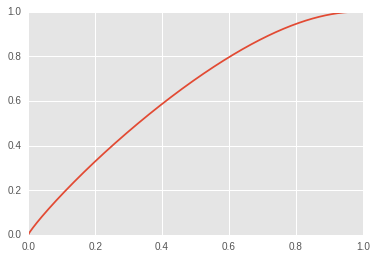

In [65]:
plt.plot(np.array(range(hack_lic.size))/hack_lic.size, np.cumsum(hack_lic)/hack_lic.sum() )

In [66]:
hack_lic/np.cumsum(hack_lic)

2013000230    1.000000e+00
2013007575    4.553395e-01
2013010227    3.111413e-01
2013008483    2.335614e-01
2013003091    1.880662e-01
2013007080    1.546002e-01
2013007498    1.329024e-01
2013008459    1.162754e-01
2013006687    1.013922e-01
2013001844    8.903408e-02
2013003487    8.132282e-02
2013000056    7.510613e-02
2013005950    6.981218e-02
2013015896    6.450391e-02
2013004884    6.055348e-02
2013002949    5.677955e-02
2013023765    5.369128e-02
2013017871    5.063339e-02
2013009052    4.802240e-02
2013009274    4.539692e-02
2013001458    4.317467e-02
2013010174    4.135764e-02
2013001719    3.951221e-02
2013019993    3.775887e-02
2013008187    3.633107e-02
2013013465    3.495313e-02
2013017331    3.352043e-02
2013000214    3.238437e-02
2013015575    3.136852e-02
2013008598    3.032244e-02
                  ...     
2013029107    6.767463e-08
2013031269    6.767463e-08
2013031503    6.767462e-08
2013031497    6.767462e-08
2013030966    6.767461e-08
2013031496    6.767461e-08
2